#### Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

#### load data 

In [2]:
address=r"F:\Tutorials\Certified program in MACHINE LEARNING and ARTIFICIAL INTELLIGENCE\Assignments\assignment_4\titanic.csv"
data=pd.read_csv(address)

#### analyze data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#### Split data to feature matrix and label
X=data[['Pclass','SibSp','Parch','Fare']]
y=data['Survived']

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


#### Scale data

In [6]:
def scale_std(X_train,X_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std,X_test_std

#### Split dataset to training and testing set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 712 records.
The testing dataset has 179 records.


In [8]:
X_train_std,X_test_std=scale_std(X_train,X_test)

#### function to plot confusion_matrix, accuracy

In [9]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    

In [10]:
def acc_model(model,X_train,y_train,X_test,y_test,kf):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
    err=accuracy_score(y_test, ypred)
    score=cross_val_score(model,X,y,cv=kf).mean()
    print(".......................................................................")
    print(model)
    print(".......................................................................")
    print('{}% of the test samples are corrrectly classified'.format(err*100))
    print('{}% of the test samples are corrrectly classified using K-Fold validation\n'.format(score*100))
    plt.figure(figsize=(3,3),dpi=100)
    plot_conf(ypred,y_test)
    plt.show()
    
    return err,score

#### Classification models 

In [11]:
kf=KFold(n_splits=5)  # cross validation with Kfold

.......................................................................
LogisticRegression()
.......................................................................
71.50837988826815% of the test samples are corrrectly classified
68.24430355909861% of the test samples are corrrectly classified using K-Fold validation



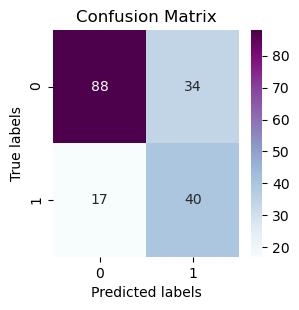

.......................................................................
SVC()
.......................................................................
65.36312849162012% of the test samples are corrrectly classified
66.55953800765802% of the test samples are corrrectly classified using K-Fold validation



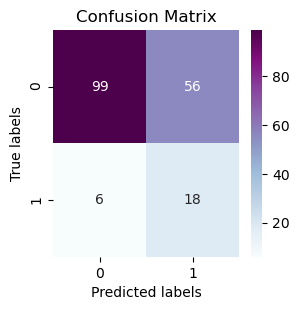

Best k: 12
.......................................................................
KNeighborsClassifier(n_neighbors=12)
.......................................................................
72.06703910614524% of the test samples are corrrectly classified
68.35791852363317% of the test samples are corrrectly classified using K-Fold validation



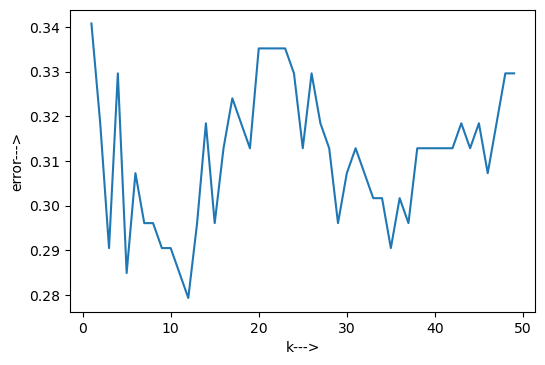

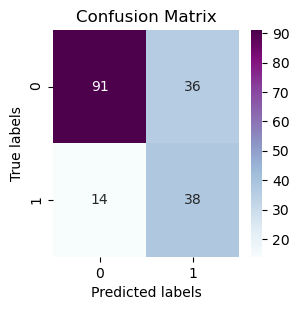

.......................................................................
DecisionTreeClassifier()
.......................................................................
69.27374301675978% of the test samples are corrrectly classified
68.91343920657837% of the test samples are corrrectly classified using K-Fold validation



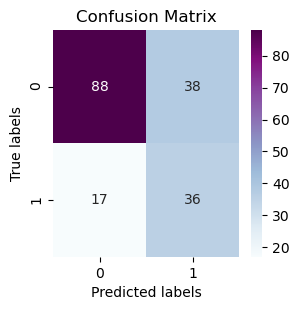

.......................................................................
RandomForestClassifier(random_state=42)
.......................................................................
69.83240223463687% of the test samples are corrrectly classified
68.58012679681124% of the test samples are corrrectly classified using K-Fold validation



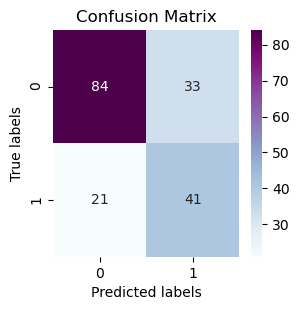

In [12]:
### Logistic Regression
model=LogisticRegression()
err1,score1=acc_model(model,X_train_std,y_train,X_test_std,y_test,kf) 

### SVM
model= SVC()
err2,score2=acc_model(model,X_train,y_train,X_test,y_test,kf)  

### KNN

# Finding the best k value
err=[]
for k in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors=k)
    modelKNN=neigh.fit(X_train,y_train)
    ypred=modelKNN.predict(X_test)
    acc=accuracy_score(y_test, ypred)
    err.append(1-acc)
plt.figure(dpi=100)
plt.plot(range(1,50),err)
plt.xlabel('k--->')
plt.ylabel('error--->')

k=err.index(min(err))+1
print('Best k:',k)

model=KNeighborsClassifier(n_neighbors=k)
err3,score3=acc_model(model,X_train,y_train,X_test,y_test,kf)  

### Decision Tree
model=DecisionTreeClassifier()
err4,score4=acc_model(model,X_train,y_train,X_test,y_test,kf) 
### Random Forest
model=RandomForestClassifier(n_estimators=100, random_state=42)
err5,score5=acc_model(model,X_train,y_train,X_test,y_test,kf)  


#### Classification using SVM by hyperparameter optimization

In [13]:
parameters ={'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

grid_search = GridSearchCV( SVC(), 
                            parameters, 
                            cv=5,
                            scoring='accuracy',n_jobs=-1)

In [14]:
grid_result= grid_search.fit(X_train,y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.6994385895794347


.......................................................................
SVC(C=100, gamma=0.1)
.......................................................................
72.06703910614524% of the test samples are corrrectly classified
69.81482643901826% of the test samples are corrrectly classified using K-Fold validation



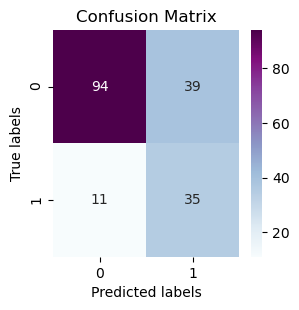

In [15]:
### SVM with parameter optimization
model=SVC(C=100, gamma= 0.1,kernel='rbf')
err6,score6=acc_model(model,X_train,y_train,X_test,y_test,kf)  

In [16]:
models=['LR', 'SVM','KNN','DT', 'RF','SVM-Tuned']
accuracy=[err1,err2,err3,err4,err5,err6]
accuracy_kfold=[score1,score2,score3,score4,score5,score6]

result_list = pd.DataFrame(np.column_stack([models,[x * 100 for x in accuracy],[x * 100 for x in accuracy_kfold]]), 
                               columns=['Classifier', 'accuracy','accuracy_CV'])

result_list.set_index('Classifier')
result_list.sort_values(by=['accuracy_CV'],ascending=False).set_index('Classifier')

,accuracy,accuracy_CV
Classifier,,
SVM-Tuned,72.06703910614524,69.81482643901826
DT,69.27374301675978,68.91343920657837
RF,69.83240223463687,68.58012679681124
KNN,72.06703910614524,68.35791852363317
LR,71.50837988826815,68.24430355909861
SVM,65.36312849162012,66.55953800765802
